In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import scipy.stats as stats

In [3]:
conn = sqlite3.connect('inventory.db')

df = pd.read_sql_query("SELECT * FROM vendor_sales_summary", conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


# EDA

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


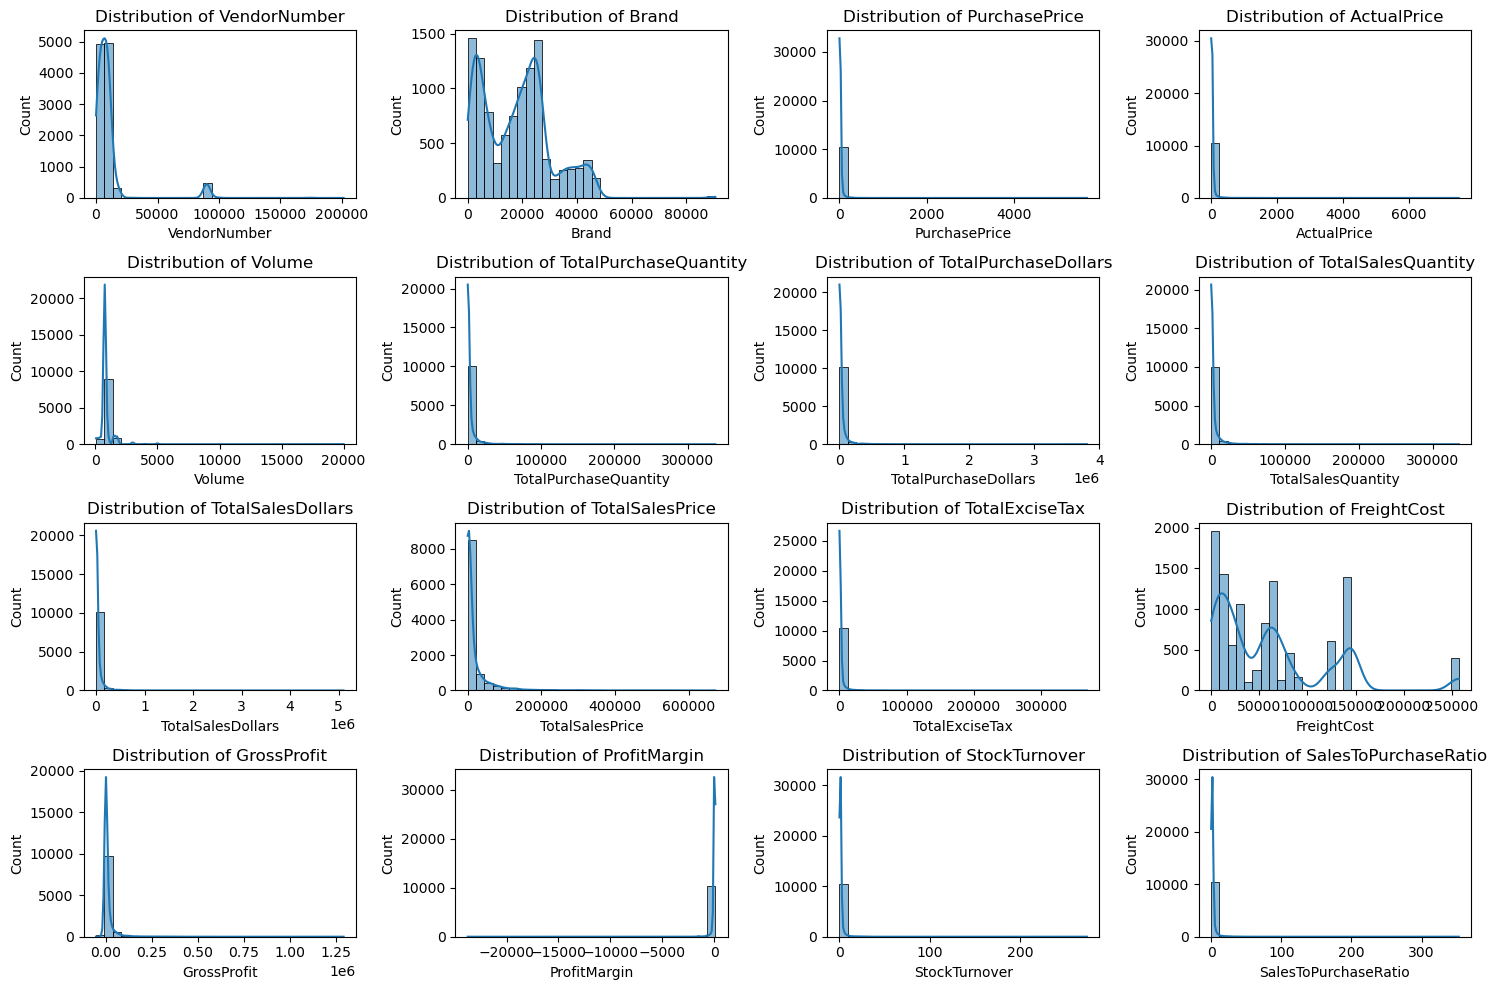

In [5]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    # plt.xlabel(col)
    # plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

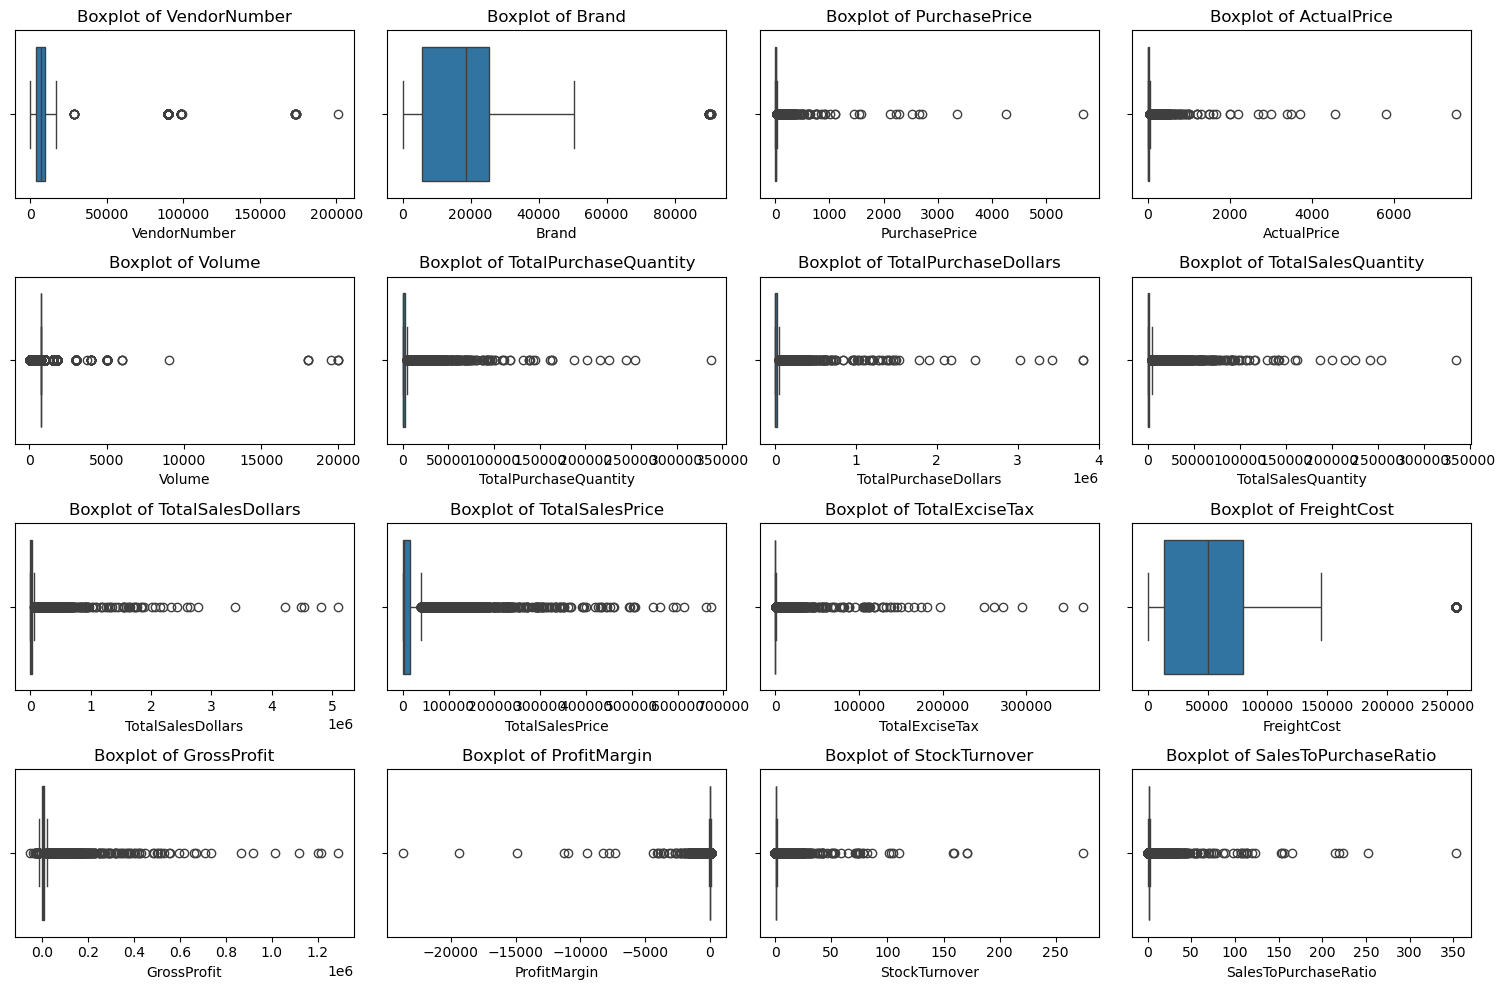

In [6]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    # plt.xlabel(col)
plt.tight_layout()
plt.show()

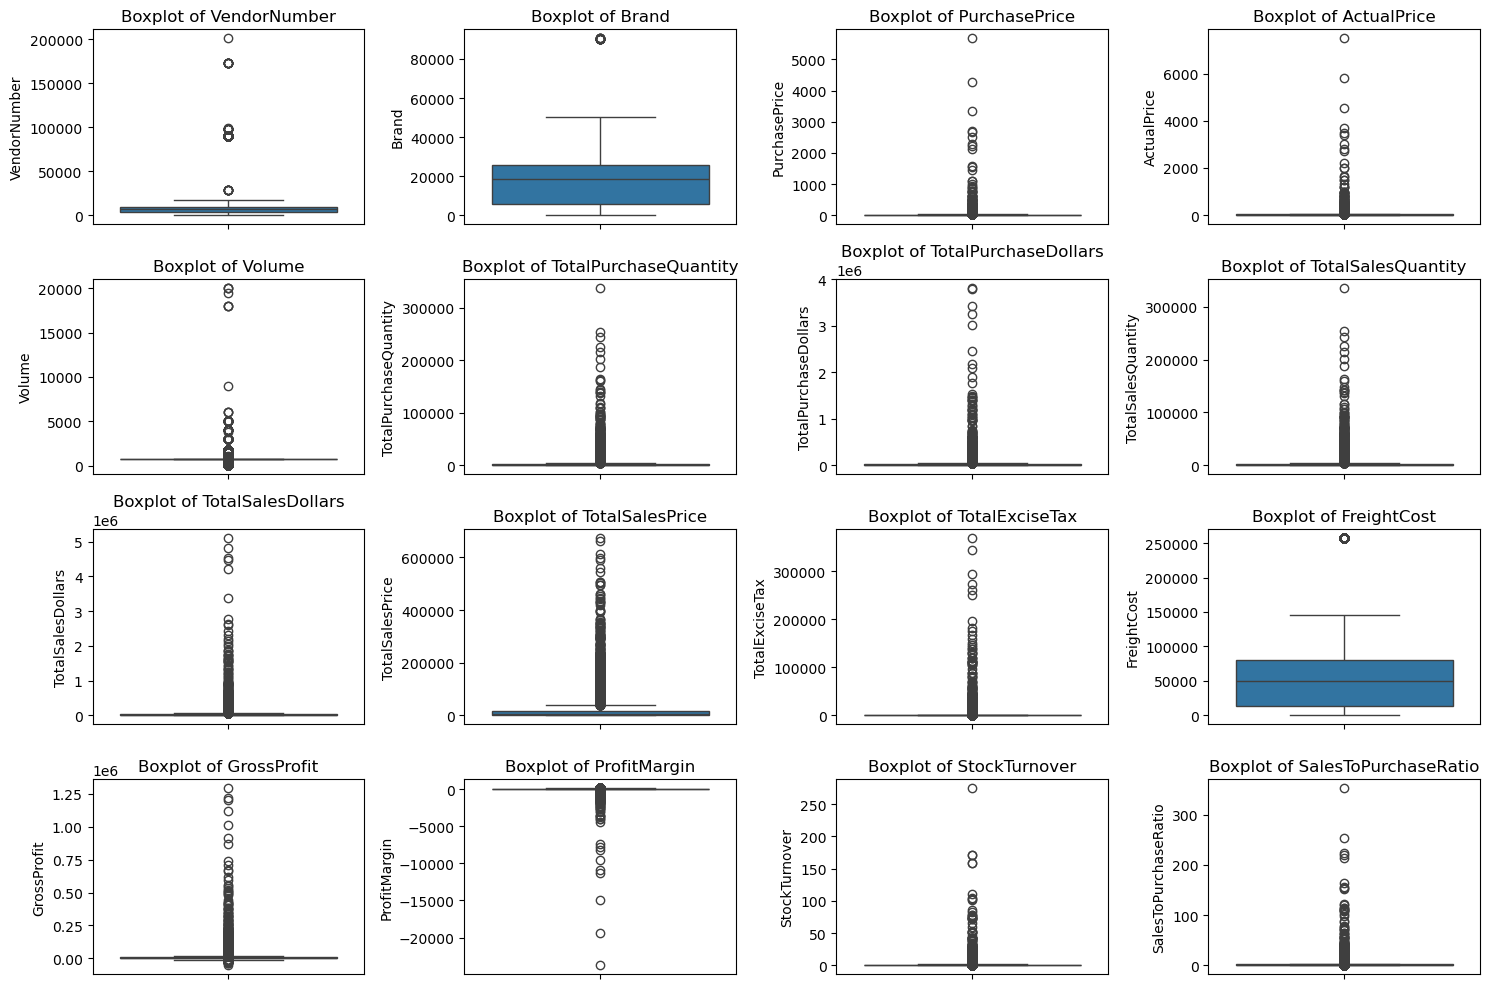

In [7]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Filtering Outliers

In [8]:
df = pd.read_sql_query("""SELECT * FROM vendor_sales_summary 
                        WHERE GrossProfit > 0
                        AND ProfitMargin > 0
                        AND TotalSalesQuantity > 0""", conn)

In [9]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


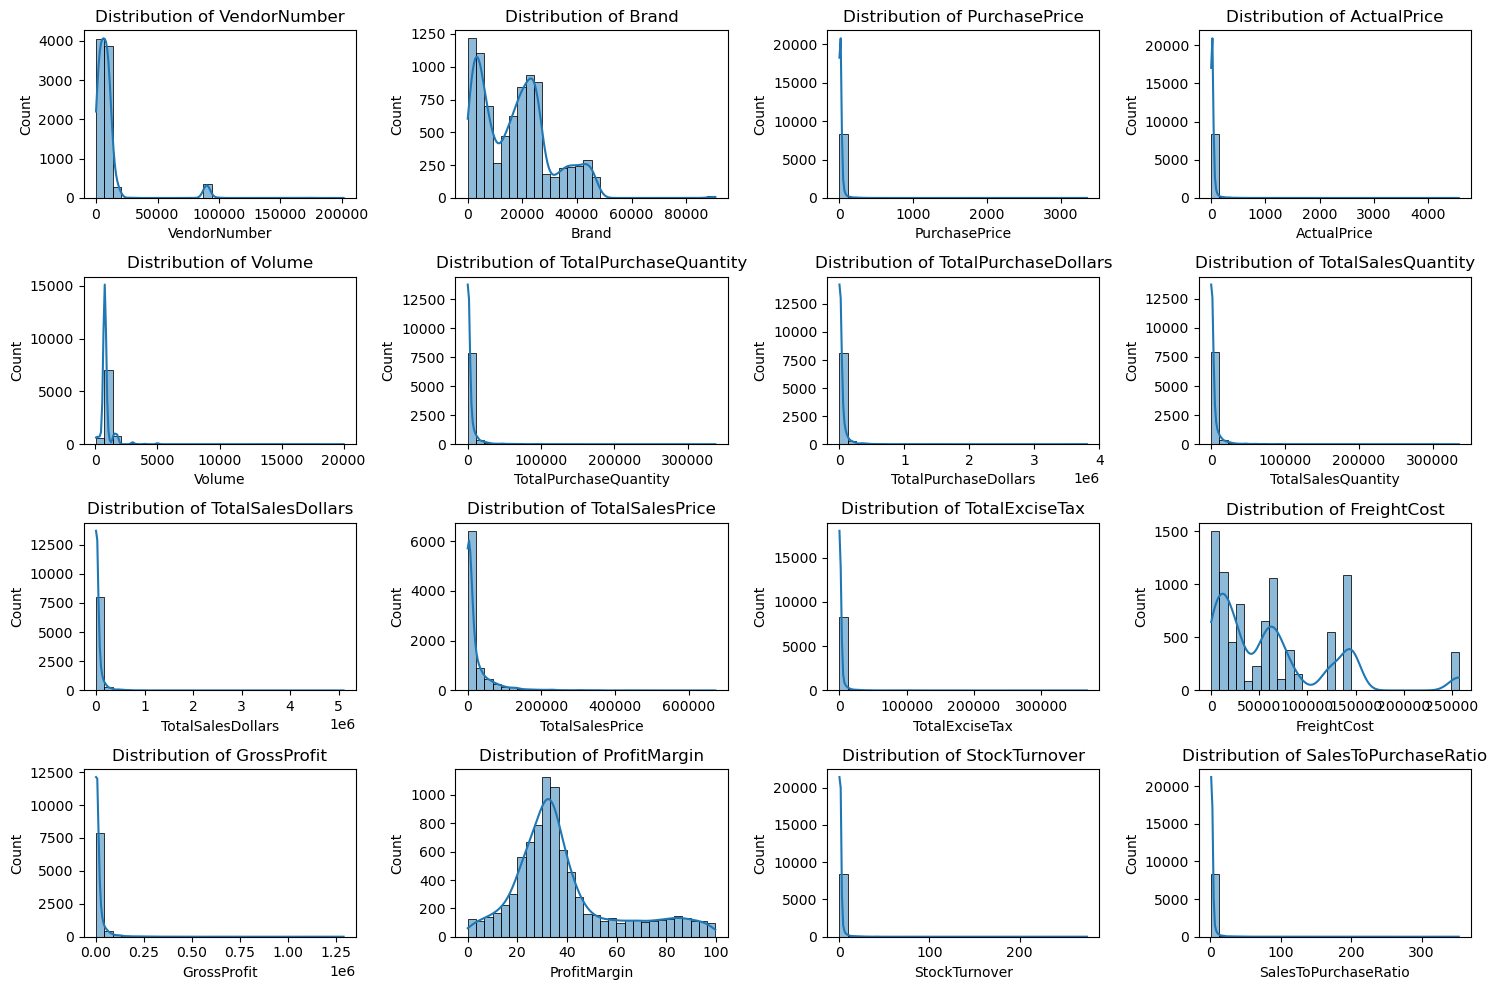

In [10]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    # plt.xlabel(col)
    # plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

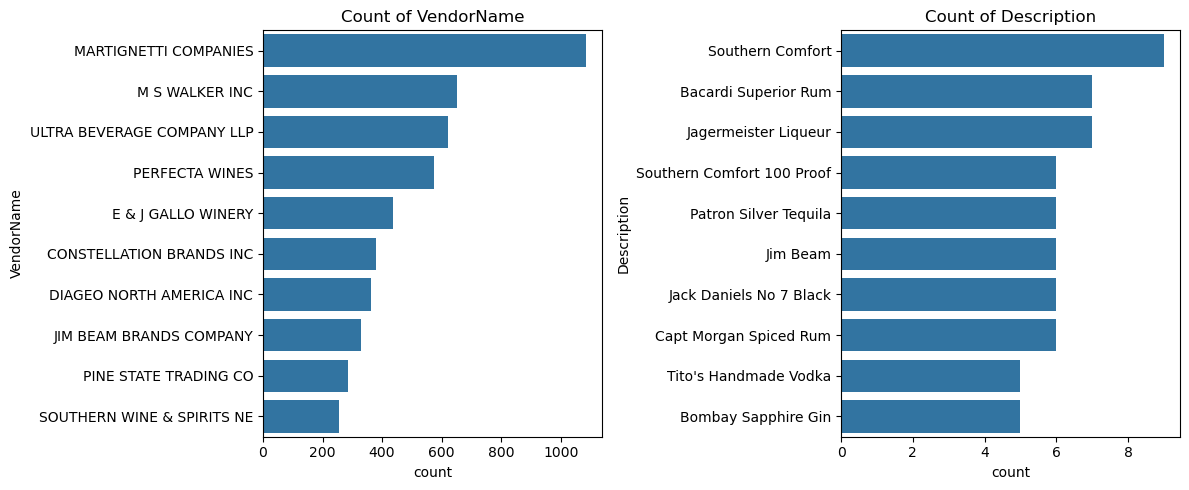

In [11]:
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10]) # Top 10 categories
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()

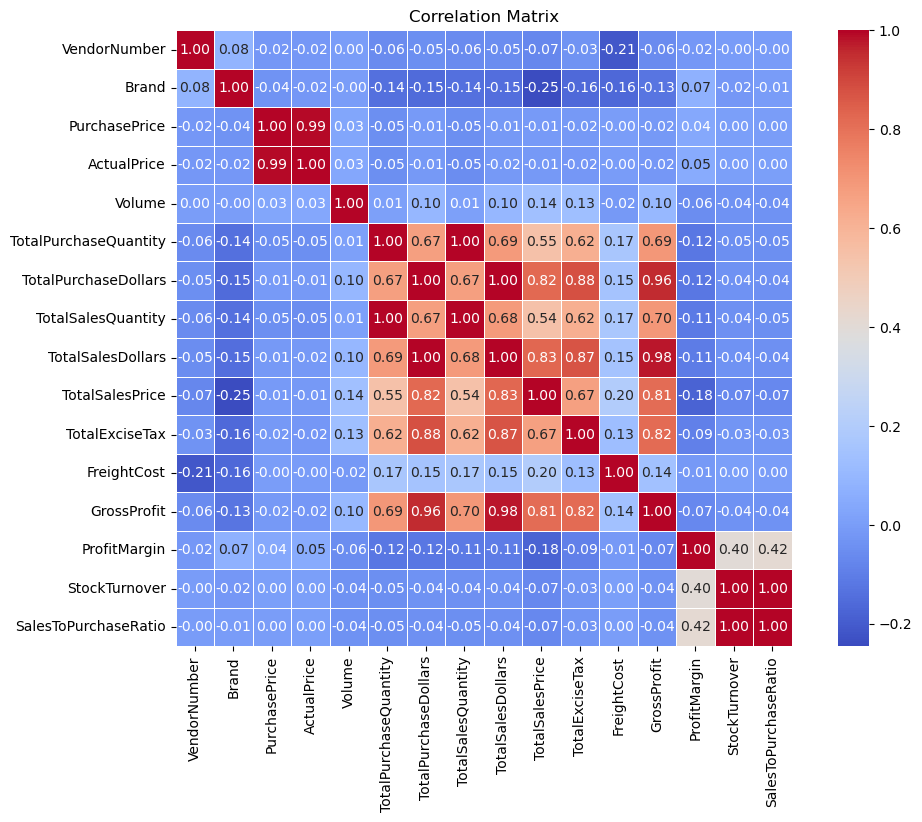

In [12]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Finding Products to Boost

In [13]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars': 'sum',
    'ProfitMargin': 'mean',}).reset_index()

In [14]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [15]:
low_sales_threshold, high_margin_threshold

(560.299, 64.97017552750113)

In [16]:
target_brands = brand_performance[(brand_performance['TotalSalesDollars'] < low_sales_threshold) & (brand_performance['ProfitMargin'] > high_margin_threshold)]
print("Brands to Boost (Low Sales High Profit Margins):")
display(target_brands.sort_values(by='TotalSalesDollars', ascending=True))

Brands to Boost (Low Sales High Profit Margins):


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [17]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars'] < 10000]

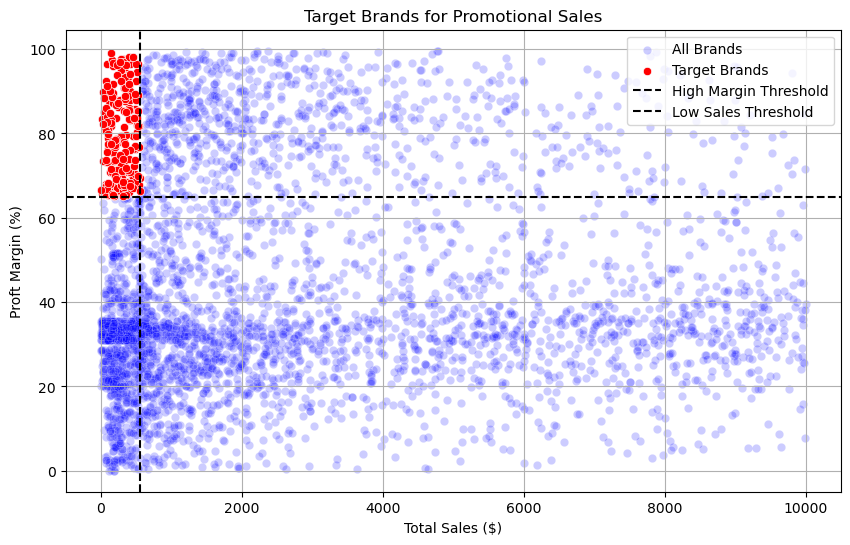

In [18]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color="blue", label='All Brands', alpha=0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label='Target Brands')



plt.axhline(high_margin_threshold, color='black', linestyle='--', label='High Margin Threshold')
plt.axvline(low_sales_threshold, color='black', linestyle='--', label='Low Sales Threshold')

plt.xlabel('Total Sales ($)')
plt.ylabel('Proft Margin (%)')
plt.title('Target Brands for Promotional Sales')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
top_vendors = df.groupby('VendorName')["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby('Description')["TotalSalesDollars"].sum().nlargest(10)

In [20]:
def format_dollars(value):
    if value >= 1e6:
        return f'${value/1e6:.2f}M'
    elif value >= 1e3:
        return f'${value/1e3:.2f}K'
    else:
        return f'${value:.2f}'

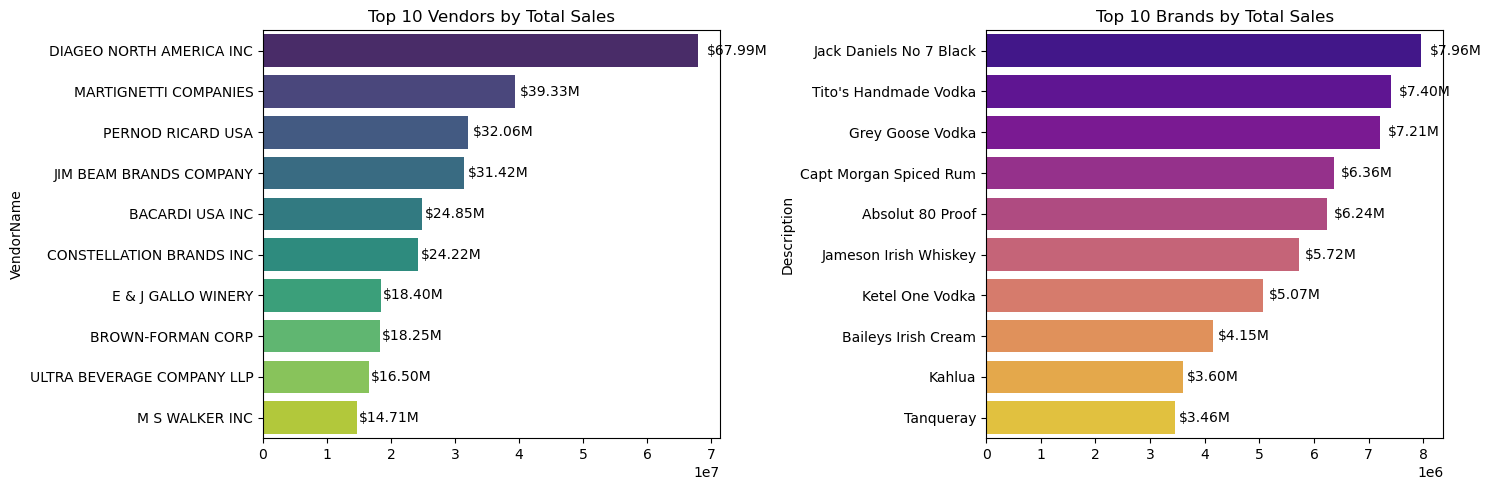

In [21]:
plt.figure(figsize=(15, 5))


plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette='viridis', hue=top_vendors.index)
plt.title('Top 10 Vendors by Total Sales')

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02), 
            bar.get_y() + bar.get_height()/2, 
            format_dollars(bar.get_width()), 
            ha='left', va='center', fontsize=10, color='black')

plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette='plasma', hue=top_brands.index)
plt.title('Top 10 Brands by Total Sales')

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02), 
            bar.get_y() + bar.get_height()/2, 
            format_dollars(bar.get_width()), 
            ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

# Which vendors contribute most to total purchase dollars 

In [22]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars': 'sum',
    'GrossProfit': 'sum',
    'TotalSalesDollars': 'sum'
}).reset_index()

In [23]:
vendor_performance['PurchaseContribution'] = vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum()

In [24]:
round(vendor_performance.sort_values(by='PurchaseContribution', ascending=False), 2)

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution
25,DIAGEO NORTH AMERICA INC,50097226.16,17892873.26,67990099.42,0.16
57,MARTIGNETTI COMPANIES,25502095.83,13828263.53,39330359.36,0.08
68,PERNOD RICARD USA,23851164.17,8212032.02,32063196.19,0.08
46,JIM BEAM BRANDS COMPANY,23494304.32,7928716.14,31423020.46,0.08
6,BACARDI USA INC,17432020.26,7422796.88,24854817.14,0.06
...,...,...,...,...,...
33,FANTASY FINE WINES CORP,128.64,198.95,327.59,0.00
107,UNCORKED,118.74,58.20,176.94,0.00
85,SILVER MOUNTAIN CIDERS,77.18,265.33,342.51,0.00
16,CAPSTONE INTERNATIONAL,54.64,192.23,246.87,0.00


In [25]:
top_vendors = vendor_performance.nlargest(10, 'PurchaseContribution')
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution
25,DIAGEO NORTH AMERICA INC,$50.10M,$17.89M,$67.99M,0.163003
57,MARTIGNETTI COMPANIES,$25.50M,$13.83M,$39.33M,0.082977
68,PERNOD RICARD USA,$23.85M,$8.21M,$32.06M,0.077606
46,JIM BEAM BRANDS COMPANY,$23.49M,$7.93M,$31.42M,0.076444
6,BACARDI USA INC,$17.43M,$7.42M,$24.85M,0.056719
20,CONSTELLATION BRANDS INC,$15.27M,$8.95M,$24.22M,0.049697
11,BROWN-FORMAN CORP,$13.24M,$5.01M,$18.25M,0.043076
30,E & J GALLO WINERY,$12.07M,$6.33M,$18.40M,0.039268
106,ULTRA BEVERAGE COMPANY LLP,$11.17M,$5.34M,$16.50M,0.036335
53,M S WALKER INC,$9.76M,$4.94M,$14.71M,0.031771


In [26]:
top_vendors['PurchaseContribution'].sum()

0.6568960039360743

In [27]:
top_vendors['CummulativeContribution'] = top_vendors['PurchaseContribution'].cumsum()

top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution,CummulativeContribution
25,DIAGEO NORTH AMERICA INC,$50.10M,$17.89M,$67.99M,0.163003,0.163003
57,MARTIGNETTI COMPANIES,$25.50M,$13.83M,$39.33M,0.082977,0.245981
68,PERNOD RICARD USA,$23.85M,$8.21M,$32.06M,0.077606,0.323586
46,JIM BEAM BRANDS COMPANY,$23.49M,$7.93M,$31.42M,0.076444,0.400031
6,BACARDI USA INC,$17.43M,$7.42M,$24.85M,0.056719,0.456750
20,CONSTELLATION BRANDS INC,$15.27M,$8.95M,$24.22M,0.049697,0.506447
11,BROWN-FORMAN CORP,$13.24M,$5.01M,$18.25M,0.043076,0.549523
30,E & J GALLO WINERY,$12.07M,$6.33M,$18.40M,0.039268,0.588791
106,ULTRA BEVERAGE COMPANY LLP,$11.17M,$5.34M,$16.50M,0.036335,0.625125
53,M S WALKER INC,$9.76M,$4.94M,$14.71M,0.031771,0.656896


C:\Users\jonat\AppData\Local\Temp\ipykernel_3972\2879489659.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vendors['VendorName'],


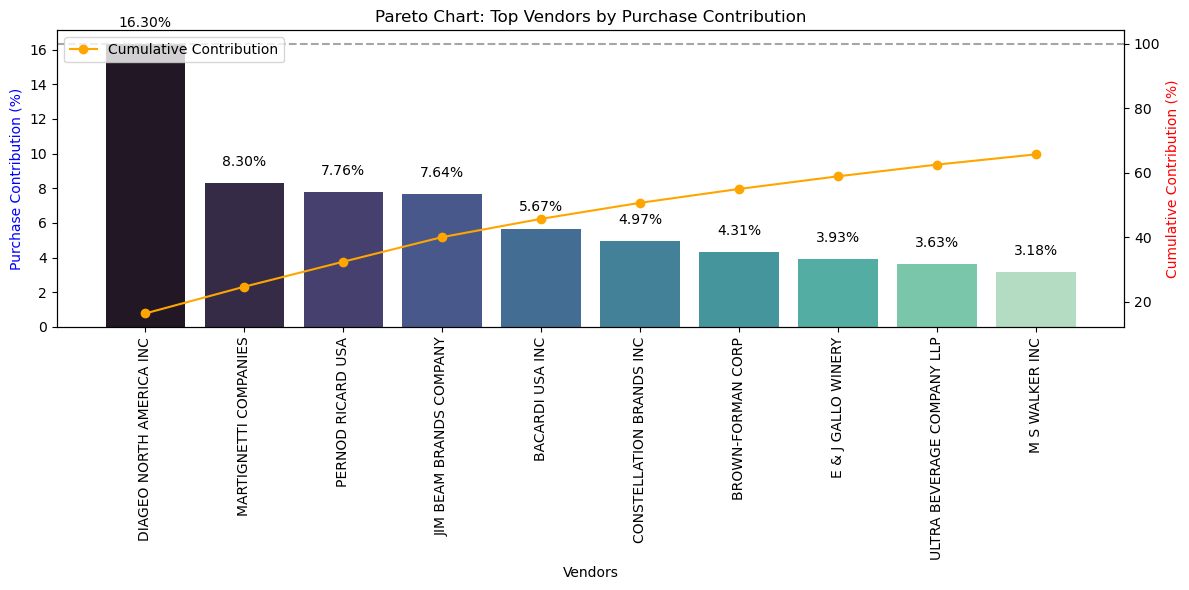

In [28]:
fig, ax = plt.subplots(figsize=(12, 6))

# Barplot of individual vendor contribution
sns.barplot(x=top_vendors['VendorName'], 
            y=top_vendors['PurchaseContribution'] * 100, 
            ax=ax, 
            palette='mako')

# Add percentage labels above bars
for i, value in enumerate(top_vendors['PurchaseContribution']):
    ax.text(i, value * 100 + 1, f'{value:.2%}', ha='center', fontsize=10, color='black')

# Set primary y-axis label
ax.set_ylabel('Purchase Contribution (%)', color='blue')
ax.set_xlabel('Vendors')
ax.set_title('Pareto Chart: Top Vendors by Purchase Contribution')
ax.tick_params(axis='x', rotation=90)

# Secondary y-axis for cumulative contribution
ax2 = ax.twinx()
ax2.plot(top_vendors['VendorName'], 
         top_vendors['CummulativeContribution'] * 100, 
         color='orange', marker='o', label='Cumulative Contribution')

# Set secondary y-axis label
ax2.set_ylabel('Cumulative Contribution (%)', color='red')
ax2.axhline(y=100, color='gray', linestyle='--', alpha=0.7)

# Add legend
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [29]:
print(f"Total Purchase Contribution of Top Vendors: {top_vendors['PurchaseContribution'].sum():.2%}")

Total Purchase Contribution of Top Vendors: 65.69%


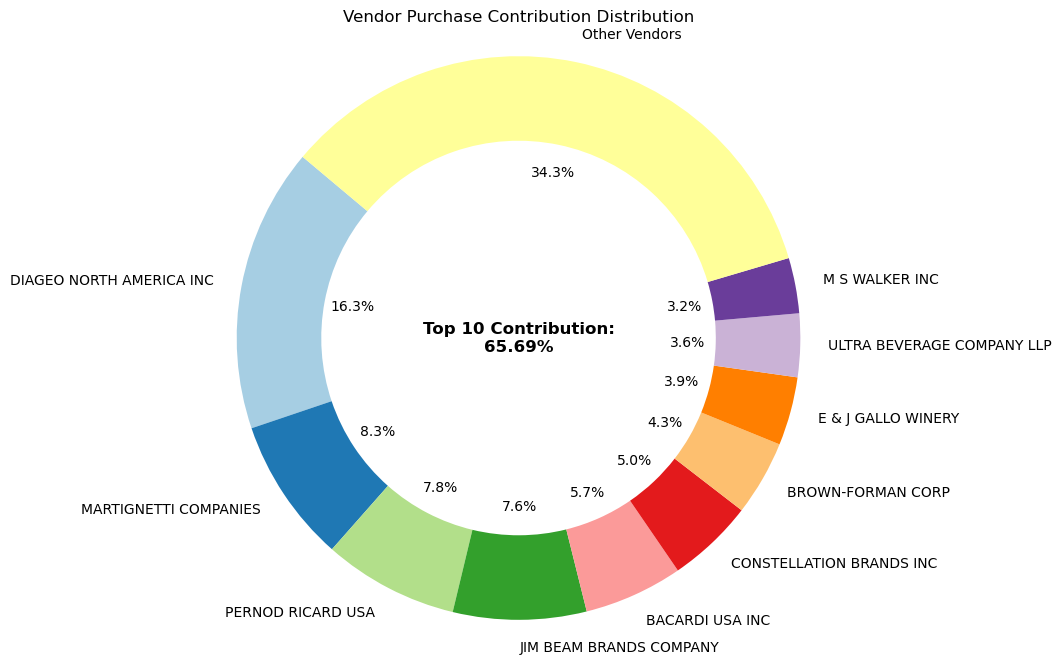

In [30]:
# Prepare data
vendors = list(top_vendors['VendorName'].values)
purchase_contribution = list(top_vendors['PurchaseContribution'].values)
total_contribution = sum(purchase_contribution)
remaining_contribution = 1 - total_contribution

# Add 'Other Vendors' slice if necessary
if remaining_contribution > 0:
    vendors.append('Other Vendors')
    purchase_contribution.append(remaining_contribution)

# Create donut chart
fig, ax = plt.subplots(figsize=(8, 8))
# colors = sns.color_palette("pastel", len(vendors))

wedges, texts, autotexts = ax.pie(
    purchase_contribution,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors,
    wedgeprops=dict(width=0.3)  # donut effect
)

# Center text for Top 10 Contribution
plt.text(0, 0, f'Top 10 Contribution:\n{total_contribution:.2%}', 
         ha='center', va='center', fontsize=12, fontweight='bold', color='black')

# Formatting
plt.title('Vendor Purchase Contribution Distribution')
plt.axis('equal')  # Equal aspect ratio ensures circle

# plt.tight_layout()
plt.show()

In [31]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'], 
                            q=3, 
                            labels=['Small', 'Medium', 'Large'])


In [32]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

C:\Users\jonat\AppData\Local\Temp\ipykernel_3972\1505448859.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('OrderSize')[['UnitPurchasePrice']].mean()


,UnitPurchasePrice
OrderSize,
Small,39.068186
Medium,15.486414
Large,10.777625


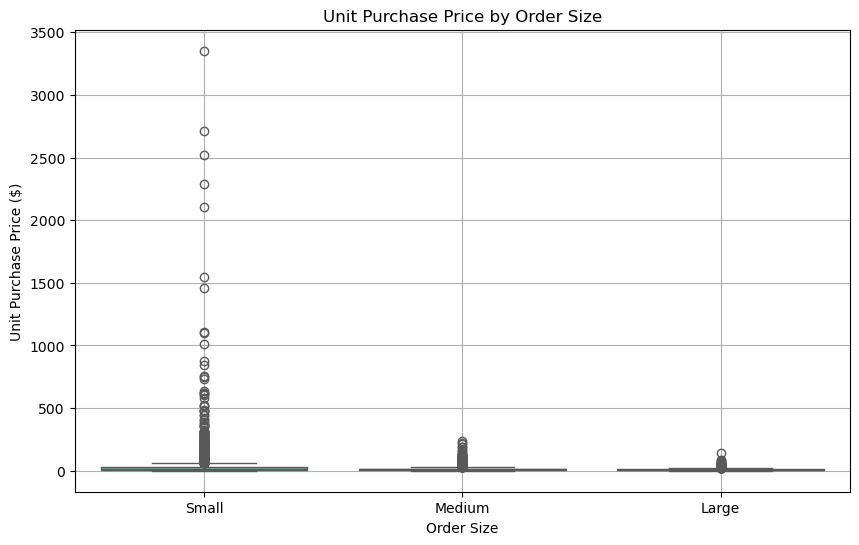

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='OrderSize', y='UnitPurchasePrice', data=df, palette='Set2', hue='OrderSize')
plt.title('Unit Purchase Price by Order Size')
plt.xlabel('Order Size')
plt.ylabel('Unit Purchase Price ($)')
plt.grid(True)
plt.show()

In [34]:
df[df['StockTurnover'] < 1].groupby('VendorName')[['StockTurnover']].mean().sort_values(by='StockTurnover', ascending=True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


In [35]:
df["UnsoldedInventoryValue"] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']) * df['UnitPurchasePrice']
print("Total Unsold Capital:", format_dollars(df["UnsoldedInventoryValue"].sum()))

Total Unsold Capital: $2.71M


In [36]:
inventory_value_per_vendor = df.groupby('VendorName')['UnsoldedInventoryValue'].sum().reset_index()

inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by='UnsoldedInventoryValue', ascending=False)
inventory_value_per_vendor['UnsoldedInventoryValue'] = inventory_value_per_vendor['UnsoldedInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldedInventoryValue
25,DIAGEO NORTH AMERICA INC,$722.21K
46,JIM BEAM BRANDS COMPANY,$554.67K
68,PERNOD RICARD USA,$470.63K
116,WILLIAM GRANT & SONS INC,$401.96K
30,E & J GALLO WINERY,$228.28K
79,SAZERAC CO INC,$198.44K
11,BROWN-FORMAN CORP,$177.73K
20,CONSTELLATION BRANDS INC,$133.62K
61,MOET HENNESSY USA INC,$126.48K
77,REMY COINTREAU USA INC,$118.60K


In [37]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
bottom_threshold = df['TotalSalesDollars'].quantile(0.25)

In [38]:
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
bottom_vendors = df[df["TotalSalesDollars"] <= bottom_threshold]["ProfitMargin"].dropna()

In [39]:
def confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    std_err = stats.sem(data)
    t_critical = stats.t.ppf((1 + confidence) / 2, len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean, mean - margin_of_error, mean + margin_of_error

Top Vendors - Mean: 3117.79%, CI: (3074.21%, 3161.38%)
Bottom Vendors - Mean: 4156.92%, CI: (4050.14%, 4263.69%)


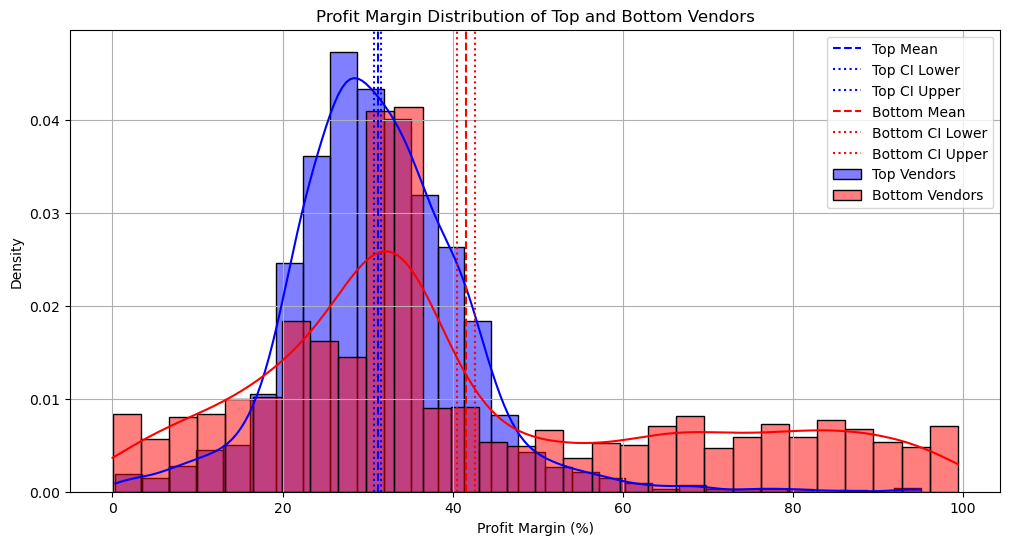

In [40]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
bottom_mean, bottom_lower, bottom_upper = confidence_interval(bottom_vendors)

print(f"Top Vendors - Mean: {top_mean:.2%}, CI: ({top_lower:.2%}, {top_upper:.2%})")
print(f"Bottom Vendors - Mean: {bottom_mean:.2%}, CI: ({bottom_lower:.2%}, {bottom_upper:.2%})")

plt.figure(figsize=(12, 6))

sns.histplot(top_vendors, color='blue', label='Top Vendors', kde=True, stat='density', bins=30)
plt.axvline(top_mean, color='blue', linestyle='--', label='Top Mean')
plt.axvline(top_lower, color='blue', linestyle=':', label='Top CI Lower')
plt.axvline(top_upper, color='blue', linestyle=':', label='Top CI Upper')

sns.histplot(bottom_vendors, color='red', label='Bottom Vendors', kde=True, stat='density', bins=30)
plt.axvline(bottom_mean, color='red', linestyle='--', label='Bottom Mean')
plt.axvline(bottom_lower, color='red', linestyle=':', label='Bottom CI Lower')
plt.axvline(bottom_upper, color='red', linestyle=':', label='Bottom CI Upper')

plt.title('Profit Margin Distribution of Top and Bottom Vendors')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
bottom_threshold = df['TotalSalesDollars'].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
bottom_vendors = df[df["TotalSalesDollars"] <= bottom_threshold]["ProfitMargin"].dropna()

t_stat, p_value = stats.ttest_ind(top_vendors, bottom_vendors, equal_var=False)
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("The difference in profit margins between top and bottom vendors is statistically significant.")
else:
    print("The difference in profit margins between top and bottom vendors is not statistically significant.")



T-statistic: -17.6695, P-value: 0.0000
The difference in profit margins between top and bottom vendors is statistically significant.


In [42]:
df = pd.read_sql_query("SELECT * FROM vendor_sales_summary", conn)
df.to_csv('vendor_sales_summary.csv', index=False)

In [43]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388
